In [4]:
# 19 OCt 2019 
# Building Decision Tree, ROC curve, Hyper parameter tuning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
import os

#os.chdir('C:\\Users\mmarri\OneDrive - hsconline\Trainings')  # poin to your local drive

from sklearn.linear_model import LogisticRegression     

diabetes_df = pd.read_csv('diabetes.csv')

#diabetes_df[['BloodPressure', 'Glucose','Age']]

y = diabetes_df['Outcome']

diabetes_df.drop(columns='Outcome',inplace=True)  #dropping output variable from the dataset. Seting the inplace parameter to True so that drop happens immediately

# Splitting the data in to 80 : 20 ratio for traning and test purpose, "random" is used to freeze the data

X_train,X_test,y_train,y_test=train_test_split(diabetes_df,y,test_size=0.20,random_state=31)  # to not change the random model 

#X_train.shape

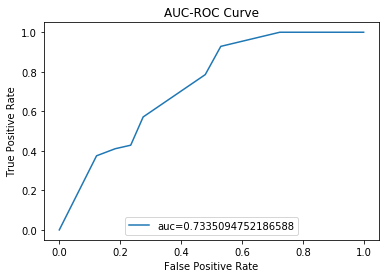

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, roc_auc_score, roc_curve

decision_tree = DecisionTreeClassifier(max_depth=3)

decision_tree.fit(X_train,y_train)   # X - input variables data, y - output variable data

y_dt_pred=decision_tree.predict(X_test)

df=pd.DataFrame({'Test':y_test,'Pred':y_dt_pred})

y_pred_proba = decision_tree.predict_proba(X_test)[::,1]  # used for slicing

y_pred_proba

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('AUC-ROC Curve')

plt.legend(loc=8)
plt.show()

In [50]:
fpr, tpr, thresholds

(array([0.        , 0.12244898, 0.18367347, 0.23469388, 0.2755102 ,
        0.47959184, 0.53061224, 0.7244898 , 1.        ]),
 array([0.        , 0.375     , 0.41071429, 0.42857143, 0.57142857,
        0.78571429, 0.92857143, 1.        , 1.        ]),
 array([1.83486239, 0.83486239, 0.8       , 0.625     , 0.56603774,
        0.26623377, 0.20408163, 0.17525773, 0.01612903]))

In [70]:
from sklearn.model_selection import GridSearchCV

Param_dict = {'max_depth':[3,4,6,8,9],
              'min_samples_split':[2,3,5,7],
             'min_samples_leaf':[3,6,7,8]}

grid_search = GridSearchCV(decision_tree, param_grid=Param_dict,cv=5)

grid_search.fit(X_train,y_train)

grid_pred=grid_search.predict(X_test)

grid_search.best_estimator_
grid_search.best_params_

dt1 = DecisionTreeClassifier(random_state=42, max_depth= 4, min_samples_leaf=3, min_samples_split=7)
dt1.fit(X_train,y_train)
best_tree_pred=dt1.predict(X_test)
print(accuracy_score(y_test,grid_pred))
accuracy_score(y_test,best_tree_pred)


0.6363636363636364


C:\Users\KESHAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6363636363636364

In [76]:
from sklearn.model_selection import RandomizedSearchCV

Param_dict = {'max_depth':[3,4,6,8,9],
              'min_samples_split':[2,3,5,7],
             'min_samples_leaf':[3,6,7,8]}

random_search = RandomizedSearchCV(decision_tree, param_distributions=Param_dict,cv=5, n_iter=60)

random_search.fit(X_train,y_train)

random_pred=random_search.predict(X_test)

random_search.best_estimator_
random_search.best_params_

C:\Users\KESHAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 4}